<a href="https://colab.research.google.com/github/Behnaz81/MachineLearningDaily/blob/main/day03_breast_cancer_classification/MachineLearning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In this project I'm using breast cancer dataset.

In [81]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
acc = []

## Decision Tree

A decision tree is a flowchart-like representation of decisions and their possible outcomes, used to analyze and make informed choices.

In [84]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

[Text(0.5770833333333333, 0.9375, 'worst perimeter <= -0.011\ngini = 0.466\nsamples = 455\nvalue = [168, 287]'),
 Text(0.4041666666666667, 0.8125, 'worst concave points <= 0.704\ngini = 0.095\nsamples = 279\nvalue = [14, 265]'),
 Text(0.490625, 0.875, 'True  '),
 Text(0.30833333333333335, 0.6875, 'area error <= 0.182\ngini = 0.05\nsamples = 271\nvalue = [7, 264]'),
 Text(0.21666666666666667, 0.5625, 'worst concave points <= 0.342\ngini = 0.037\nsamples = 268\nvalue = [5, 263]'),
 Text(0.13333333333333333, 0.4375, 'smoothness error <= -1.22\ngini = 0.015\nsamples = 257\nvalue = [2, 255]'),
 Text(0.06666666666666667, 0.3125, 'mean texture <= 0.152\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.03333333333333333, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.1, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.3125, 'worst texture <= 1.281\ngini = 0.008\nsamples = 251\nvalue = [1, 250]'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsamples = 233\nva

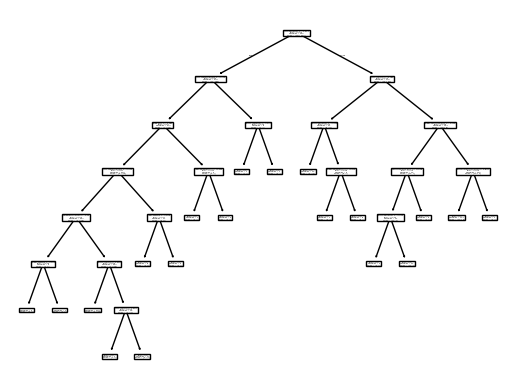

In [85]:
tree.plot_tree(dtree, feature_names=X.columns)

In [86]:
y_pred = dtree.predict(X_test)

As you can see this model had the lowest accuracy score.

In [87]:
acc.append(accuracy_score(y_test, y_pred))

In [88]:
accuracy_score(y_test, y_pred)

0.9649122807017544

Confusion matrix can help us understand which class was harder to predict by the model. As we can see there was one false negative and 4 false positive cases.

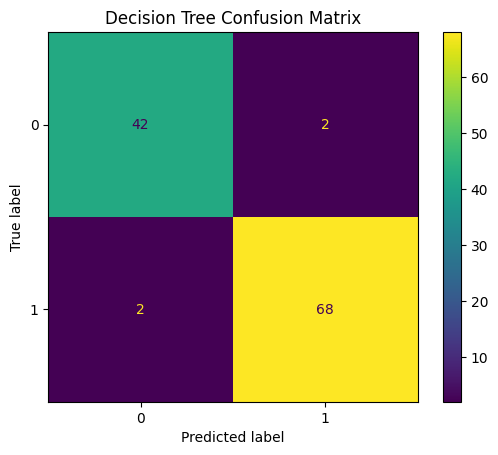

In [89]:
cm = confusion_matrix(y_test, y_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtree.classes_)
disp.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

## Logistic Regression

In [90]:
clf = LogisticRegression()

In [91]:
clf = clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
y_pred = clf.predict(X_test)

As we can see this model had the best accuracy score.

In [93]:
acc.append(accuracy_score(y_test, y_pred))

In [94]:
accuracy_score(y_test, y_pred)

0.9824561403508771

As shown this model had no false negative and 2 false positive cases. This model has worked well beside the accuracy score which is good in this case which is a medical case, having the least false negative cases is important!

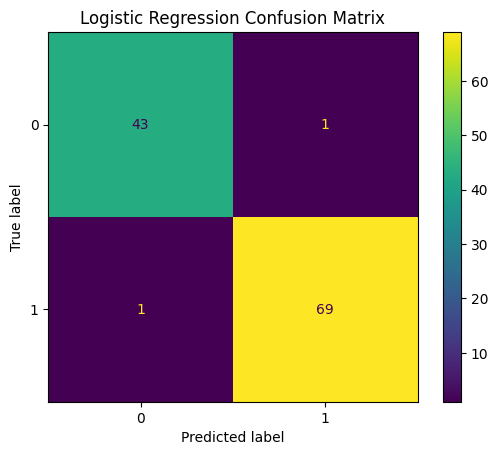

In [95]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## KNN

In [96]:
knn = KNeighborsClassifier(n_neighbors=3)

In [97]:
knn = knn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [98]:
y_pred = knn.predict(X_test)

This model had a good accuracy score too.

In [99]:
acc.append(accuracy_score(y_test, y_pred))

In [100]:
accuracy_score(y_test, y_pred)

0.9649122807017544

And as you can see there were no false negative cases which is great.

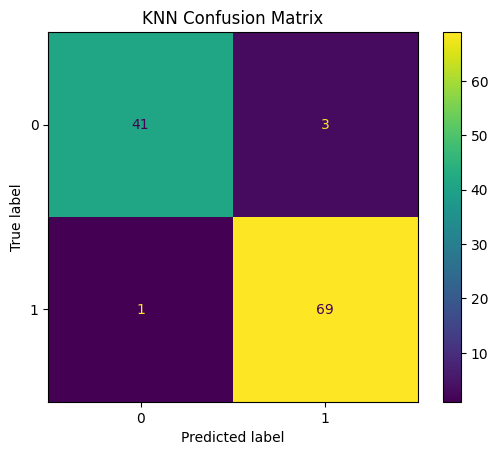

In [101]:
cm = confusion_matrix(y_test, y_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtree.classes_)
disp.plot()
plt.title("KNN Confusion Matrix")
plt.show()

## Conclusion

<BarContainer object of 3 artists>

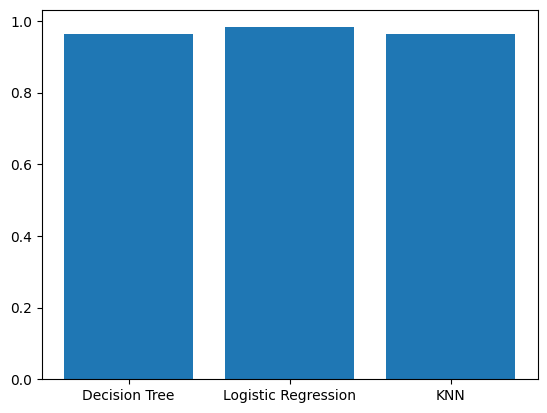

In [102]:
plt.bar(["Decision Tree", "Logistic Regression", "KNN"], acc)

As seen in this project, logistic regression performed well on this dataset. This is likely because the data is linearly separable and we also scaled the features, which benefits models like logistic regression.
On the other hand, decision trees may tend to overfit the training data and therefore might not generalize as well.
KNN can also be sensitive to noise and may not perform optimally when the decision boundaries are linear.

However, a better way to evaluate model performance is by using k-fold cross-validation, which reduces the dependency on a specific train-test split and provides a more robust estimate of model accuracy.